Missing values:
 Country                   0
Region                    0
Kilotons of Co2           0
Metric Tons Per Capita    0
Year                      0
dtype: int64

Basic statistics:
        Kilotons of Co2  Metric Tons Per Capita         Year
count     5.677000e+03             5677.000000  5677.000000
mean      1.412292e+05                4.325505  2004.543421
std       6.491258e+05                5.503834     8.643419
min       0.000000e+00                0.000000  1990.000000
25%       1.380000e+03                0.570000  1997.000000
50%       9.170000e+03                2.360000  2005.000000
75%       5.848000e+04                6.340000  2012.000000
max       1.070722e+07               47.650000  2019.000000

Top 10 emitting countries in 2019 :
 Country
China            10707219.73
United States     4817720.21
India             2456300.05
Russia            1703589.97
Japan             1081569.95
Germany            657400.02
Iran               630010.01
Indonesia          61

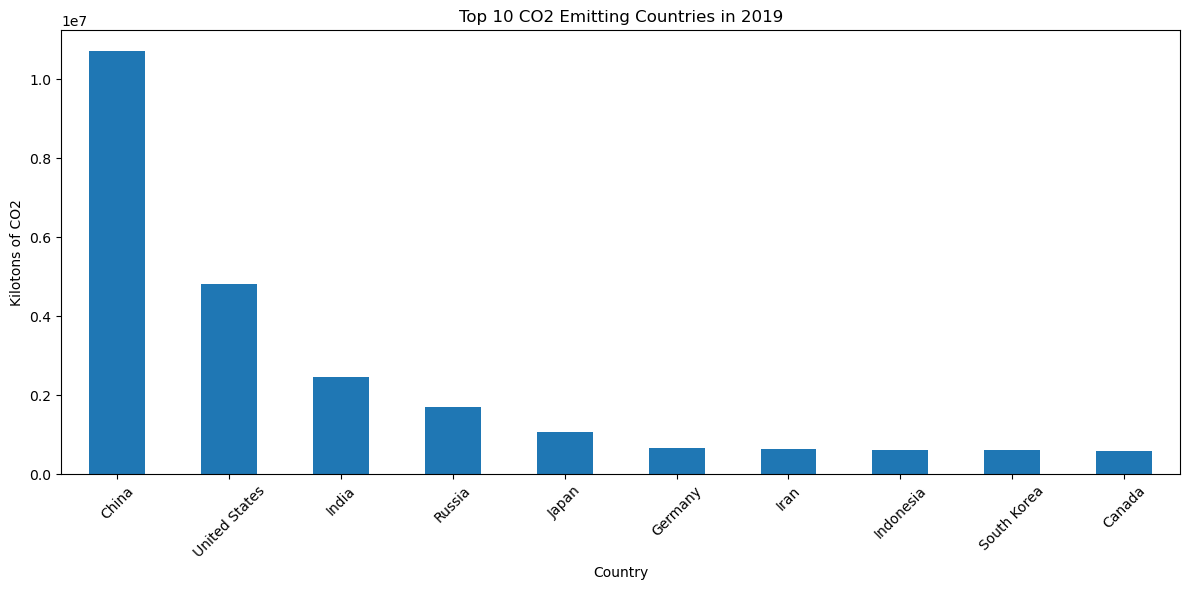

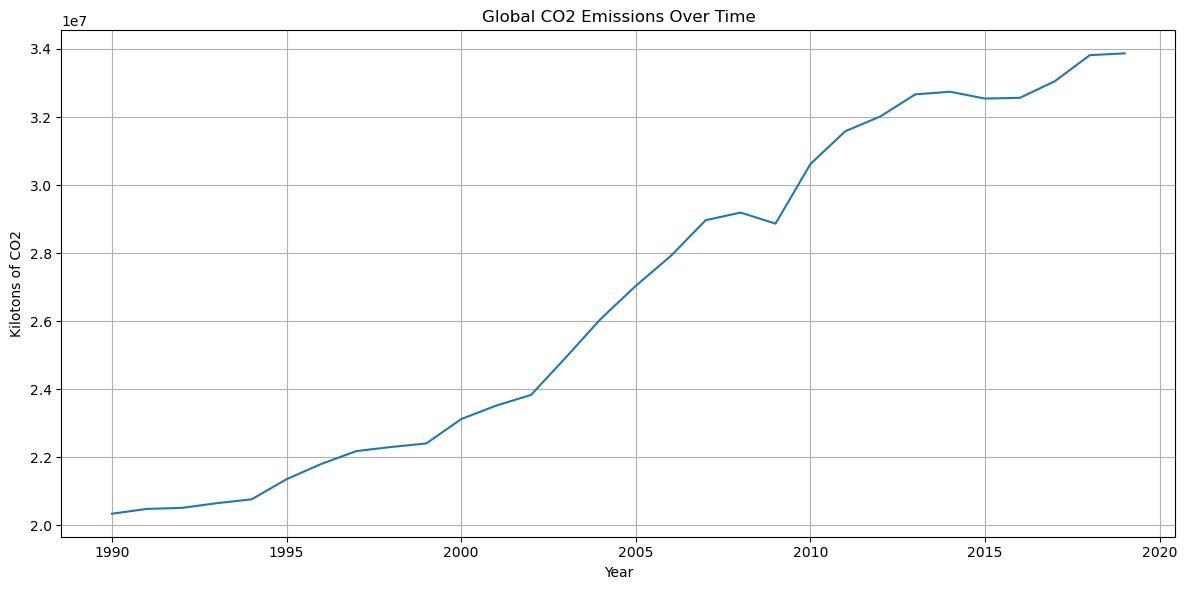

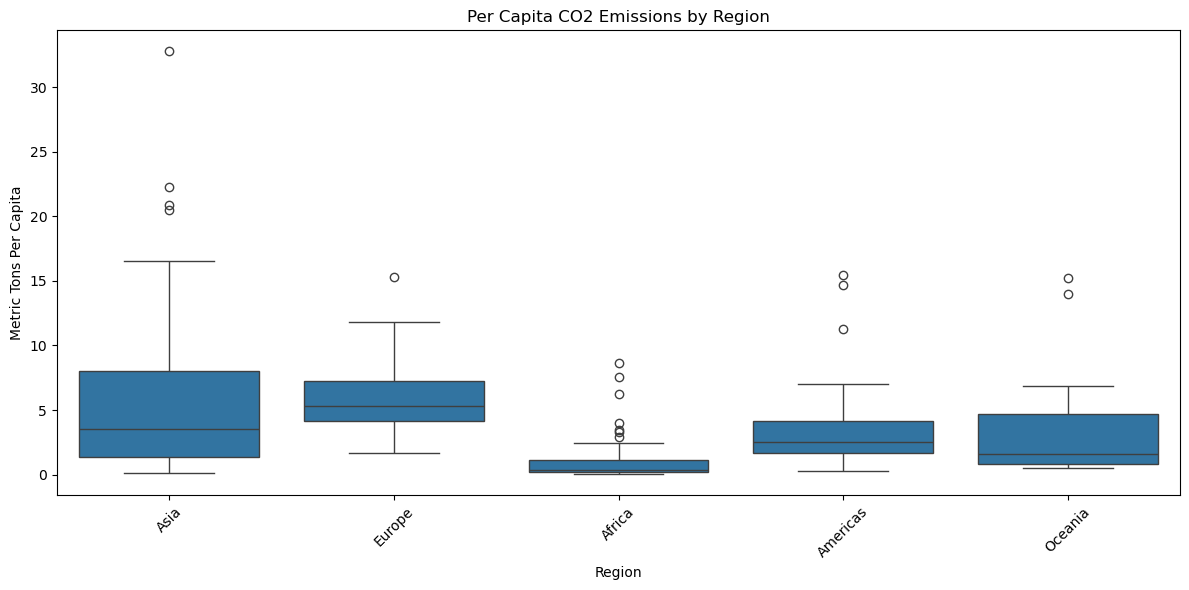

In [1]:
# carbon_emission_analysis.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

# Load the dataset
df = pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv')

# Data Cleaning
# Convert Date to datetime and extract year
df['Year'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.year

# Drop the original Date column
df.drop('Date', axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics
print("\nBasic statistics:\n", df.describe())

# Save cleaned data to pickle for Streamlit app
with open('carbon_data.pkl', 'wb') as f:
    pickle.dump(df, f)

# Analysis 1: Top emitting countries in latest year
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]

top_countries = latest_data.groupby('Country')['Kilotons of Co2'].sum().nlargest(10)
print("\nTop 10 emitting countries in", latest_year, ":\n", top_countries)

# Analysis 2: Emission trends over time
global_emissions = df.groupby('Year')['Kilotons of Co2'].sum()
print("\nGlobal emissions over time:\n", global_emissions)

# Visualization 1: Top emitting countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title(f'Top 10 CO2 Emitting Countries in {latest_year}')
plt.ylabel('Kilotons of CO2')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_countries.png')
plt.show()

# Visualization 2: Global emission trend
plt.figure(figsize=(12, 6))
global_emissions.plot()
plt.title('Global CO2 Emissions Over Time')
plt.ylabel('Kilotons of CO2')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('global_trend.png')
plt.show()

# Visualization 3: Per capita emissions by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=latest_data, x='Region', y='Metric Tons Per Capita')
plt.title('Per Capita CO2 Emissions by Region')
plt.ylabel('Metric Tons Per Capita')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('per_capita_by_region.png')
plt.show()